## PREDICCIÓN DE DECISION  DE LA FED

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample

## seleccion de modelo 

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample

# Replace 'entrenamiento.csv' with the filename of your CSV file
csv_filename = 'entrenamiento.csv'

# Load CSV file into a DataFrame
data = pd.read_csv(csv_filename)

print("DataFrame loaded successfully.")

# Preprocess the data
data = data.drop(columns=['date'])  # Ensure 'date' column exists
data['prev_decision'] = data['prev_decision'].astype('category')
X = data.drop(columns=['next_decision'])
y = data['next_decision']

# Undersample the majority class to have the same number of observations as the minority classes
class_neg1 = data[data.next_decision == -1]
class_0 = data[data.next_decision == 0]
class_1 = data[data.next_decision == 1]

min_count = min(len(class_neg1), len(class_0), len(class_1))

class_neg1_undersampled = resample(class_neg1, replace=False, n_samples=min_count, random_state=42)
class_0_undersampled = resample(class_0, replace=False, n_samples=min_count, random_state=42)
class_1_undersampled = resample(class_1, replace=False, n_samples=min_count, random_state=42)

data_undersampled = pd.concat([class_neg1_undersampled, class_0_undersampled, class_1_undersampled])

X_undersampled = data_undersampled.drop(columns=['next_decision'])
y_undersampled = data_undersampled['next_decision']

# Split the undersampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=42, stratify=y_undersampled)

# Print the shapes of train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
log_reg = LogisticRegression(random_state=42, max_iter=1000)
svc = SVC(random_state=42)
grad_boost = GradientBoostingClassifier(random_state=42)
mlp = MLPClassifier(random_state=42, max_iter=1000)

# Train and evaluate Logistic Regression
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Logistic Regression")
print(classification_report(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))

# Train and evaluate Support Vector Machine (SVM)
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)
print("Support Vector Machine")
print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))

# Train and evaluate Gradient Boosting Classifier
grad_boost.fit(X_train_scaled, y_train)
y_pred_grad_boost = grad_boost.predict(X_test_scaled)
print("Gradient Boosting")
print(classification_report(y_test, y_pred_grad_boost))
print(confusion_matrix(y_test, y_pred_grad_boost))

# Train and evaluate Neural Network
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)
print("Neural Network")
print(classification_report(y_test, y_pred_mlp))
print(confusion_matrix(y_test, y_pred_mlp))


DataFrame loaded successfully.
Shape of X_train: (124, 13)
Shape of X_test: (32, 13)
Shape of y_train: (124,)
Shape of y_test: (32,)
Logistic Regression
              precision    recall  f1-score   support

          -1       0.60      0.60      0.60        10
           0       0.57      0.36      0.44        11
           1       0.67      0.91      0.77        11

    accuracy                           0.62        32
   macro avg       0.61      0.62      0.60        32
weighted avg       0.61      0.62      0.60        32

[[ 6  2  2]
 [ 4  4  3]
 [ 0  1 10]]
Support Vector Machine
              precision    recall  f1-score   support

          -1       0.50      0.40      0.44        10
           0       0.45      0.45      0.45        11
           1       0.85      1.00      0.92        11

    accuracy                           0.62        32
   macro avg       0.60      0.62      0.61        32
weighted avg       0.60      0.62      0.61        32

[[ 4  6  0]
 [ 4  5  2]
 

## gradient boost

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
from scipy.stats import randint, uniform

# Replace 'entrenamiento.csv' with the filename of your CSV file
csv_filename = 'entrenamiento.csv'

# Load CSV file into a DataFrame
data = pd.read_csv(csv_filename)

print("DataFrame loaded successfully.")

# Preprocess the data
data = data.drop(columns=['date'])  # Ensure 'date' column exists
data['prev_decision'] = data['prev_decision'].astype('category')
X = data.drop(columns=['next_decision'])
y = data['next_decision']

# Undersample the majority class to have the same number of observations as the minority classes
class_neg1 = data[data.next_decision == -1]
class_0 = data[data.next_decision == 0]
class_1 = data[data.next_decision == 1]

min_count = min(len(class_neg1), len(class_0), len(class_1))

class_neg1_undersampled = resample(class_neg1, replace=False, n_samples=min_count, random_state=42)
class_0_undersampled = resample(class_0, replace=False, n_samples=min_count, random_state=42)
class_1_undersampled = resample(class_1, replace=False, n_samples=min_count, random_state=42)

data_undersampled = pd.concat([class_neg1_undersampled, class_0_undersampled, class_1_undersampled])

X_undersampled = data_undersampled.drop(columns=['next_decision'])
y_undersampled = data_undersampled['next_decision']

# Split the undersampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=42, stratify=y_undersampled)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gb_clf, param_distributions=param_dist, n_iter=100, cv=3, scoring='f1_macro', verbose=2, random_state=42, n_jobs=-1)

# Perform RandomizedSearchCV on training data
random_search.fit(X_train_scaled, y_train)

# Print best parameters and best score from RandomizedSearchCV
print("Best parameters found:")
print(random_search.best_params_)
print("Best cross-validation F1-score (macro):")
print(random_search.best_score_)

# Evaluate best model on test data
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Print classification report and confusion matrix
print("Gradient Boosting - Best Model Evaluation")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



DataFrame loaded successfully.
Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\luisl\anaconda3\envs\tpot\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
81 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
52 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\luisl\anaconda3\envs\tpot\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\luisl\anaconda3\envs\tpot\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\luisl\anaconda3\envs\tpot\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:

Best parameters found:
{'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 16, 'n_estimators': 83, 'subsample': 0.6}
Best cross-validation F1-score (macro):
0.596235352006328
Gradient Boosting - Best Model Evaluation
              precision    recall  f1-score   support

          -1       0.70      0.70      0.70        10
           0       0.62      0.45      0.53        11
           1       0.79      1.00      0.88        11

    accuracy                           0.72        32
   macro avg       0.70      0.72      0.70        32
weighted avg       0.70      0.72      0.70        32

[[ 7  3  0]
 [ 3  5  3]
 [ 0  0 11]]


DataFrame loaded successfully.
Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\luisl\anaconda3\envs\tpot\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
81 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
47 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\luisl\anaconda3\envs\tpot\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\luisl\anaconda3\envs\tpot\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\luisl\anaconda3\envs\tpot\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:

Best parameters found:
{'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 16, 'n_estimators': 83, 'subsample': 0.6}
Best cross-validation F1-score (macro):
0.596235352006328
Gradient Boosting - Best Model Evaluation
              precision    recall  f1-score   support

          -1       0.70      0.70      0.70        10
           0       0.62      0.45      0.53        11
           1       0.79      1.00      0.88        11

    accuracy                           0.72        32
   macro avg       0.70      0.72      0.70        32
weighted avg       0.70      0.72      0.70        32

[[ 7  3  0]
 [ 3  5  3]
 [ 0  0 11]]


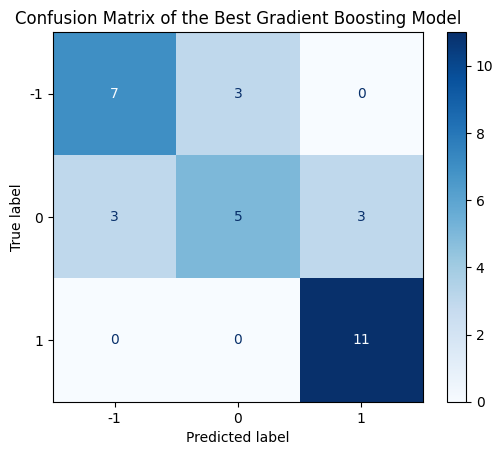

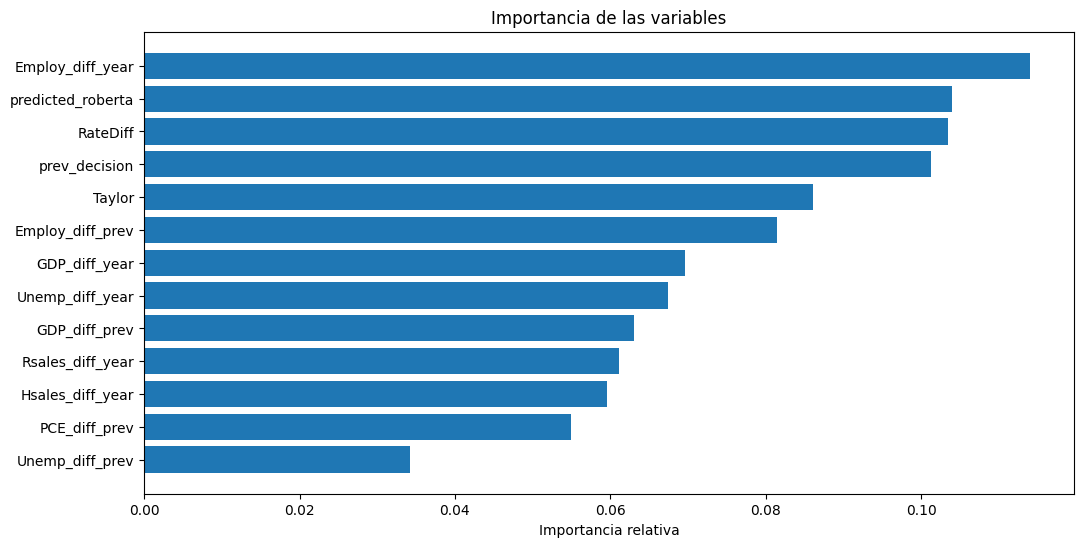

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import resample
from scipy.stats import randint, uniform

# Replace 'entrenamiento.csv' with the filename of your CSV file
csv_filename = 'entrenamiento.csv'

# Load CSV file into a DataFrame
data = pd.read_csv(csv_filename)

print("DataFrame loaded successfully.")

# Preprocess the data
data = data.drop(columns=['date'])  # Ensure 'date' column exists
data['prev_decision'] = data['prev_decision'].astype('category')
X = data.drop(columns=['next_decision'])
y = data['next_decision']

# Undersample the majority class to have the same number of observations as the minority classes
class_neg1 = data[data.next_decision == -1]
class_0 = data[data.next_decision == 0]
class_1 = data[data.next_decision == 1]

min_count = min(len(class_neg1), len(class_0), len(class_1))

class_neg1_undersampled = resample(class_neg1, replace=False, n_samples=min_count, random_state=42)
class_0_undersampled = resample(class_0, replace=False, n_samples=min_count, random_state=42)
class_1_undersampled = resample(class_1, replace=False, n_samples=min_count, random_state=42)

data_undersampled = pd.concat([class_neg1_undersampled, class_0_undersampled, class_1_undersampled])

X_undersampled = data_undersampled.drop(columns=['next_decision'])
y_undersampled = data_undersampled['next_decision']

# Split the undersampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=42, stratify=y_undersampled)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gb_clf, param_distributions=param_dist, n_iter=100, cv=3, scoring='f1_macro', verbose=2, random_state=42, n_jobs=-1)

# Perform RandomizedSearchCV on training data
random_search.fit(X_train_scaled, y_train)

# Print best parameters and best score from RandomizedSearchCV
print("Best parameters found:")
print(random_search.best_params_)
print("Best cross-validation F1-score (macro):")
print(random_search.best_score_)

# Get the best model from RandomizedSearchCV
best_grad_boost = random_search.best_estimator_

# Evaluate best model on test data
y_pred = best_grad_boost.predict(X_test_scaled)

# Print classification report and confusion matrix
print("Gradient Boosting - Best Model Evaluation")
print(classification_report(y_test, y_pred))
confusion_mat_best_grad_boost = confusion_matrix(y_test, y_pred)
print(confusion_mat_best_grad_boost)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat_best_grad_boost, display_labels=best_grad_boost.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of the Best Gradient Boosting Model")
plt.show()

# Plot feature importance
importances = best_grad_boost.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]

plt.figure(figsize=(12, 6))
plt.title("Importancia de las variables")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), names)
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.xlabel("Importancia relativa")
plt.show()
